<a href="https://colab.research.google.com/github/soohyoen/artificial-intelligence/blob/main/%EC%84%9C%EC%88%98%ED%98%84_1%EB%B0%98_%EB%91%90%EB%B2%88%EC%A7%B8%EC%8B%9C%ED%97%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 7/29 두번째 시험 - 서술형

**colab 파일 제목을 "이름_@반_두번째시험"으로 변경 후 각 반 보조강사/모니터링 매니저에게 Slack DM으로 제출해 주세요.**

시험 시간은 14:30 ~ 16:20(1시간 50분)까지 이며, 시험 시간 종료 후 제출은 절대 불가능합니다.

코드 작성하는 부분 이외에 문제나 지문을 수정하지 마세요.

### [1 ~ 3] 아래 지문을 읽고, 문제를 풀어주세요.

```
Alpha-GJ 는 제주 근해의 온도 변화에 따른 전복의 평균 나이 변화를 측정하고자 전복의 나이를 알 수 있는 전복 껍데기의 고리 수를 직접 세어가며 데이터화 시키고 있었습니다. 
하지만 직접 세는 방식은 시간이 너무 오래 걸려 신경망 기법을 활용하여 고리의 수를 예측하기로 합니다. 
수집된 변수는 종속변수를 포함한 총 9가지입니다. 
그런데 막상 모든 변수를 가지고 하는 것보다 이전에 공부한 지식을 기반으로 2 가지 변수를 제거하고자 합니다.
```

### 1. Slack 공지사항에서 제공된 abalone.csv 데이터를 불러와 'Sex', 'Height' 변수를 제거하세요. 제거된 변수는 다시 csv 파일로 만들어 생성하세요. 그리고 생성된 파일의 shape 값을 확인하여 주세요. 
(csv 파일의 이름은 다음과 같이 설정해 주세요. 'abalone_dataset.csv')

In [ ]:
import pandas as pd

abalone = pd.read_csv('/content/abalone.csv')
del abalone['Sex']
del abalone['Height']
abalone.to_csv('abalone_dataset.csv',mode='w')

abalone_dataset = pd.read_csv('/content/abalone_dataset.csv')
abalone_dataset.shape

(4177, 8)

### 2. 정제된 데이터를 바탕으로 아래 조건을 모두 만족하는 신경망을 구축하시오.

```
조건 1 - 사용할 수 있는 라이브러리는 numpy, csv 입니다.
조건 2 - 최종 정확도는 0.79 이상 이어야 합니다.
조건 3 - 하나의 스크립트에서 수행하시오.(외부에서 ipynb 파일 불러오기 X)
조건 4 - 에폭을 갱신하는 과정에서 학습 데이터를 섞어주는 기능 제거하시오.
조건 5 - 사용자에게 보여지는 결괏값은 다음과 같습니다.
  1. 초기 가중치와 편향값.
  2. 학습 데이터를 통해 측정한 정확도 및 손실값.
  3. 테스트 데이터를 통해 구한 정확도.
  4. 테스트 데이터를 통해 구한 최종 테스트 결과(정확도 및 손실값).
  ```


### 출력 예시
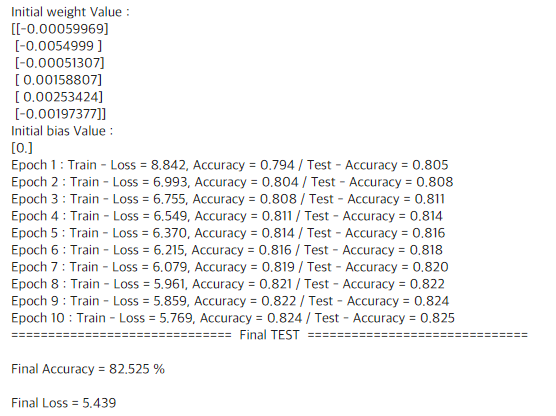

In [ ]:
import tensorflow as tf

import csv
with open('/content/abalone.csv') as csvfile:
  csvreader = csv.reader(csvfile)
  next(csvreader) # 쓸때없는거 뛰어 넘어줌
  rows = []
  for row in csvreader:
    rows.append(row)

input_cnt,output_cnt = 10 ,1
data = np.zeros([len(rows),input_cnt+output_cnt])

for n,row in enumerate(rows):
  if row[0] == 'M':data[n,0] = 1 # 원핫벡터를 시켜줌
  if row[0] == 'F':data[n,1] = 1
  if row[0] == 'I':data[n,2] = 1
  data[n,3:] = row[1:]

train_ratio = 0.8
test_begin_index = int(data.shape[0] * train_ratio)


train_data = data[:test_begin_index]
test_data = data[test_begin_index:]

train_X, train_Y = train_data[:, : -output_cnt], train_data[:, -output_cnt : ]
test_X, test_Y = test_data[:, : -output_cnt], test_data[:, -output_cnt : ]

model = LinearRegression()
model.fit(train_X, train_Y)
print('가중치(계수, 기울기, w):', model.coef_)
print('편향(절편, bias, b):', model.intercept_)

train_X_mean = np.mean(train_X, axis = 0)
train_X_std = train_X.std(axis = 0)
train_X -= train_X_mean
train_X /= train_X_std 
test_X -= train_X_mean
test_X /= train_X_std
GJ_NET_MODEL_V1 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(units = 10,
                                                             activation = 'elu',
                                                             input_shape = (10,)),
                                       tf.keras.layers.Dense(units = 23 ,
                                                             activation = 'elu'),
                                       
                                       tf.keras.layers.Dense(units = 36,
                                                              activation = 'elu'),
                                       tf.keras.layers.Dense(units =1)
])
GJ_NET_MODEL_V1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.07),
                        loss = 'mse')
history_1 = GJ_NET_MODEL_V1.fit(train_X, train_Y,
                                epochs = 10,
                                batch_size = 32,
                                validation_split = 0.2)

results =  GJ_NET_MODEL_V1.evaluate(test_X, test_Y)
result = results[1]
loss = results[0]
print(f'정확도 : {result * 100}, 손실값 : {loss}')

가중치(계수, 기울기, w): [[ 2.65359671e+13  2.65359671e+13  2.65359671e+13 -1.81054688e+00
   1.31552734e+01  9.18798828e+00  9.19921875e+00 -2.01044922e+01
  -1.08583984e+01  9.10156250e+00]]
편향(절편, bias, b): [-2.65359671e+13]
Epoch 1/10
84/84 [==============================] - 1s 3ms/step - loss: 12.0317 - val_loss: 4.4164
Epoch 2/10
84/84 [==============================] - 0s 2ms/step - loss: 6.1154 - val_loss: 4.9904
Epoch 3/10
84/84 [==============================] - 0s 2ms/step - loss: 5.8684 - val_loss: 5.6596
Epoch 4/10
84/84 [==============================] - 0s 2ms/step - loss: 5.7822 - val_loss: 3.6656
Epoch 5/10
84/84 [==============================] - 0s 2ms/step - loss: 5.7153 - val_loss: 5.1166
Epoch 6/10
84/84 [==============================] - 0s 2ms/step - loss: 5.7147 - val_loss: 4.0654
Epoch 7/10
84/84 [==============================] - 0s 2ms/step - loss: 5.7652 - val_loss: 4.2579
Epoch 8/10
84/84 [==============================] - 0s 2ms/step - loss: 5.9667 - val_loss: 4.

TypeError: ignored

### 3. 아래 조건을 모두 만족하면서 출력 예시가 나오도록 학습 과정에 따른 결과를 시각화 하시오.
```
조건 1. 위에서 구축한 모델을 바탕으로 학습 데이터의 정확도와 손실값을 에폭 수에 따른 시각화 처리를 수행하시오.
조건 2. 두 측정 지표를 각각 나눠 시각화 처리하시오.
조건 3. 테스트 데이터를 바탕으로 구해진 최종 정확도와 최종 손실값을 그래프 제목에 출력하시오.
```
### 출력 예시
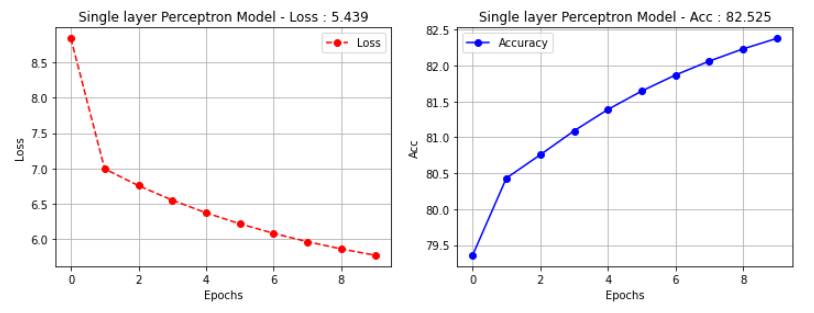


In [ ]:
# 주석을 지우고 정답 코드를 작성해 주세요.

### 4. 다음 코드의 실행 결과가 아래와 같이 나오도록 코드를 완성해 보세요(단, R2SCORE 값은 90점 이상)

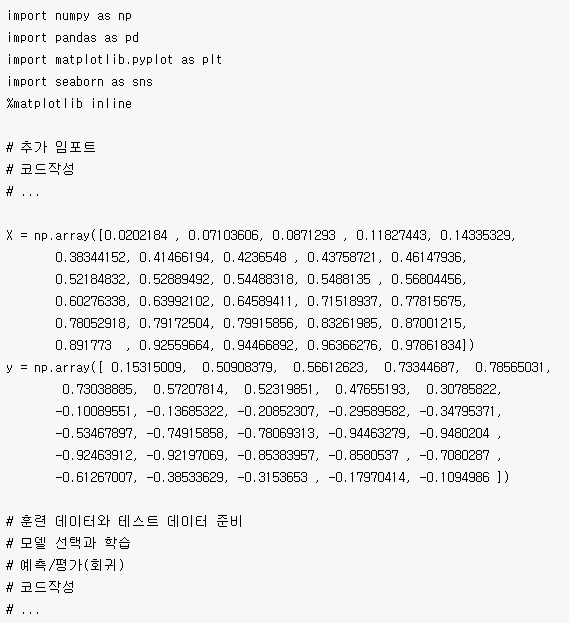

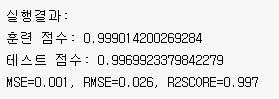

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
# 추가 임포트 
# 주석을 지우고 여기에 코드를 작성해 주세요.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston
 
X = np.array([0.0202184 , 0.07103606, 0.0871293 , 0.11827443, 0.14335329,
       0.38344152, 0.41466194, 0.4236548 , 0.43758721, 0.46147936,
       0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456,
       0.60276338, 0.63992102, 0.64589411, 0.71518937, 0.77815675,
       0.78052918, 0.79172504, 0.79915856, 0.83261985, 0.87001215,
       0.891773  , 0.92559664, 0.94466892, 0.96366276, 0.97861834])
y = np.array([ 0.15315009,  0.50908379,  0.56612623,  0.73344687,  0.78565031,
        0.73038885,  0.57207814,  0.52319851,  0.47655193,  0.30785822,
       -0.10089551, -0.13685322, -0.20852307, -0.29589582, -0.34795371,
       -0.53467897, -0.74915858, -0.78069313, -0.94463279, -0.9480204 ,
       -0.92463912, -0.92197069, -0.85383957, -0.8580537 , -0.7080287 ,
       -0.61267007, -0.38533629, -0.3153653 , -0.17970414, -0.1094986 ])
 
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
X_train.shape

# 모델 선택과 학습
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print('훈련 점수:', model.score(X_train, y_train) )
print('테스트 점수:', model.score(X_test, y_test) )

# 예측/평가(회귀)
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_pred)

print(f'MSE={np.round(mse,3)}, RMSE={np.round(rmse,3)}, R2SCORE={np.round(r2score,3)}')

훈련 점수: 0.7981568738998739
테스트 점수: 0.7455938406709182
MSE=0.037, RMSE=0.193, R2SCORE=0.746


### 5. 다음은 삽입 정렬을 수행하는 코드의 일부이다. 코드의 빈 칸을 채워넣어 정상적인 동작을 수행할 수 있도록 만들어보자. 삽입 정렬의 순서나 방향은 수업에서 설명한 내용을 기본으로 해서 작성한다. (전체 코드 내용을 제출하시오.)

  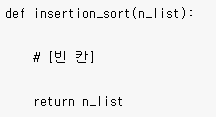

In [ ]:
def insertion_sort(n_list):
 
    bef_n_list = num_list.copy()

    o_cnt = 0
    for idx in range(len(bef_n_list)):
        print(f"{idx}번째 : {bef_n_list}")
        for now_idx in range(idx, 0, -1):
            o_cnt += 1
            if bef_n_list[now_idx-1] <= bef_n_list[now_idx]:
                break
            
            bef_n_list[now_idx], bef_n_list[now_idx-1] = bef_n_list[now_idx-1], bef_n_list[now_idx]
            print(bef_n_list)

    print(o_cnt)
    return bef_n_list

n = int(input())
num_list = []

for _ in range(n):
    num = int(input())
    num_list.append(num)

insertion_sorted_list = insertion_sort(num_list)
print(" ".join(map(str, insertion_sorted_list)))

8
3
2
1
6
5
4
7
8
0번째 : [3, 2, 1, 6, 5, 4, 7, 8]
1번째 : [3, 2, 1, 6, 5, 4, 7, 8]
[2, 3, 1, 6, 5, 4, 7, 8]
2번째 : [2, 3, 1, 6, 5, 4, 7, 8]
[2, 1, 3, 6, 5, 4, 7, 8]
[1, 2, 3, 6, 5, 4, 7, 8]
3번째 : [1, 2, 3, 6, 5, 4, 7, 8]
4번째 : [1, 2, 3, 6, 5, 4, 7, 8]
[1, 2, 3, 5, 6, 4, 7, 8]
5번째 : [1, 2, 3, 5, 6, 4, 7, 8]
[1, 2, 3, 5, 4, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8]
6번째 : [1, 2, 3, 4, 5, 6, 7, 8]
7번째 : [1, 2, 3, 4, 5, 6, 7, 8]
11
1 2 3 4 5 6 7 8


### 6. 다음 코드의 실행 결과가 아래와 같이 나오도록 코드를 완성해 보세요.

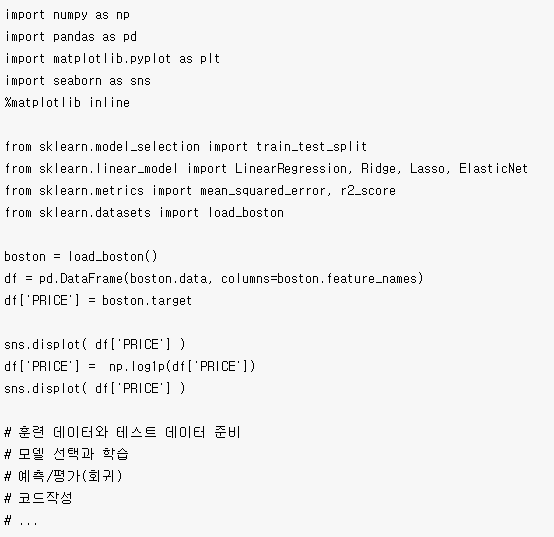

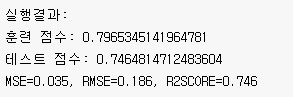


훈련 점수: 0.7981568738998739
테스트 점수: 0.7455938406709182
MSE=0.037, RMSE=0.193, R2SCORE=0.746


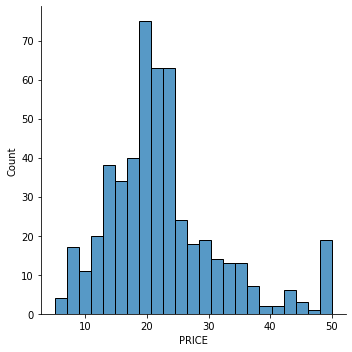

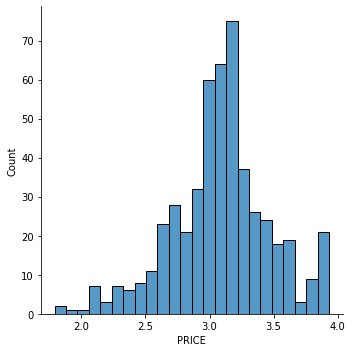

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston
 
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
 
sns.displot( df['PRICE'] )
df['PRICE'] =  np.log1p(df['PRICE'])
sns.displot( df['PRICE'] )
 
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
X_train.shape

# 모델 선택과 학습
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print('훈련 점수:', model.score(X_train, y_train) )
print('테스트 점수:', model.score(X_test, y_test) )

# 예측/평가(회귀)
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_pred)

print(f'MSE={np.round(mse,3)}, RMSE={np.round(rmse,3)}, R2SCORE={np.round(r2score,3)}')